In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('mnist_train.csv')

In [3]:
df.head(300)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df.shape)

(59999, 785)


In [5]:
print(df.columns)

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)


In [6]:
data=df.values

In [7]:
print(data)

[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


In [8]:
data.shape

(59999, 785)

In [9]:
type(data)


numpy.ndarray

In [10]:
x=data[:,1:]
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
y=data[:,0]
print(y)

[0 4 1 ... 5 6 8]


In [12]:
print(x.shape,y.shape)
print(x.shape[0])

(59999, 784) (59999,)
59999


In [13]:
split=int(0.8*x.shape[0])

In [14]:
train_x=x[:split,:]
train_y=y[:split]
print(train_x)
print(train_y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 4 1 ... 0 1 2]


In [15]:
test_x=x[split:,:]
test_y=y[split:]
print(test_x)
print(test_y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[4 7 8 ... 5 6 8]


In [16]:
#visualising samples
def drawimage(sample):
    img=sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

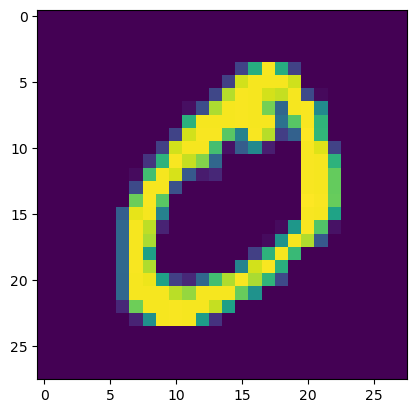

In [17]:
drawimage(train_x[0])

In [18]:
print(train_y[0])

0


In [19]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
    

In [32]:
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True) # unique data,counts and vals[:,1] because vals contains diastance and y value 
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]    
    return pred
    

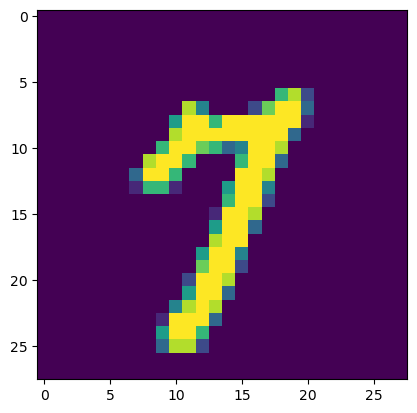

In [24]:
drawimage(test_x[1])

In [33]:
knn(train_x,train_y,test_x[1])

(array([7.]), array([5], dtype=int64))


7.0

In [22]:
print(test_y[1])

7


In [25]:
from sklearn.metrics import accuracy_score